<img src='https://www.researchgate.net/publication/339651408/figure/fig3/AS:864987794907143@1583240569937/The-actor-critic-proximal-policy-optimization-Actor-Critic-PPO-algorithm-process.ppm'>

In [1]:
%load_ext autoreload
%autoreload 2

from os.path import join

from policy_gradient.ppo import PPOAgent

In [4]:
agent = PPOAgent(
        config=dict(
#             env_or_env_name="LunarLanderContinuous-v2",
            env_or_env_name="CartPole-v1",
            
            logdir=join("Experiments", "ppo_default"),
            use_tensorboard=False,
            explore=True,
            clip_value=0.2,
            gamma=0.99,
            num_iter=100,
            num_epochs=20,
            train_batch_size=4000,
            sgd_minibatch_size=128,
            num_dim_actor=(32, 32),
            act_f_actor="tanh",
            num_dim_critic=(32, 32),
            act_f_critic="relu",
            entropy_coeff=1e-3,
            lr=0.0025,
            vf_loss_coeff=1.0,
            vf_clip_param=10.0,
            clip_gradients_by_norm=None,
            use_critic=True,
            use_gae=True,
            gae_lambda=1.0,
            standardize_advantages=True,
        )
    )

history = {}

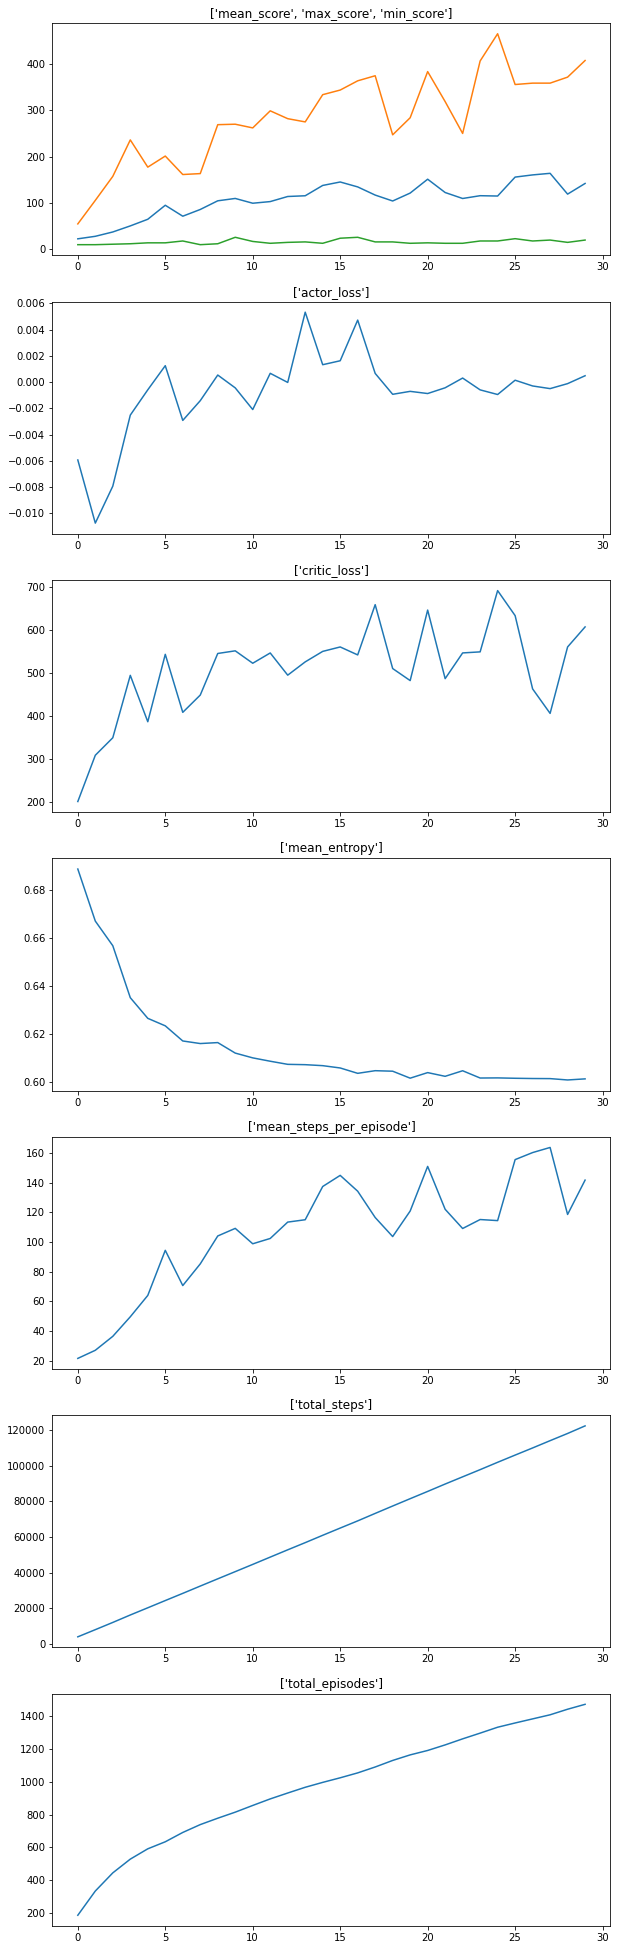

In [ ]:
history = agent.run(
    plot_stats=[
        ['mean_score',
        'max_score',
        'min_score',],
        'actor_loss',
        'critic_loss',
        'mean_entropy',
        'mean_steps_per_episode',
        'total_steps',
        'total_episodes',
    ],
    history=history,
    plot_period=1,
)
